In [1]:
%matplotlib inline

In [1]:
import spotipy
from credentials import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
from datetime import datetime

In [6]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

scope = 'user-library-read' #this came from the tutorial ¯\_(ツ)_/¯
user = '125065858' #had to get this from the spotify desktop app

In [101]:
# generate the arrays first

playlists = sp.user_playlists(user)
arr = []

while playlists:
    
    for i, playlist in enumerate(playlists['items']):
        if '*' not in playlist['name']:
            print(playlist['name'])
            playlist_length = 0
            
            playlist_id, playlist_name, playlist_uri = playlist['id'], playlist['name'], playlist['uri']

            tracks = sp.user_playlist_tracks(user=user,playlist_id=playlist_id)
            tracklist = tracks['items']
            for track in tracklist:
                track_info = track['track']
                track_id, track_name, track_popularity, track_uri, added_on = track_info['id'], track_info['name'], track_info['popularity'], track_info['uri'], track['added_at']
                playlist_length += 1
                print('Song count:', playlist_length, end='\r')
                
                track_arr = [playlist_id, playlist_name, playlist_uri, track_id, track_name, track_popularity, track_uri, added_on]
                #feature_arr = list(sp.audio_features(tracks=['2uPc8UjfmiuzmAJj3VBs8N'])[0].values()) #this takes too long!
                arr.append(track_arr)# + feature_arr)

            print()
            
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

# either write data to file line by line within loops, or take all arrays, stuff them into a dataframe, and write to csv
        
df = pd.DataFrame(arr,columns=[
    'playlist_id', 
    'playlist_name', 
    'playlist_uri', 
    'track_id', 
    'track_name', 
    'track_popularity', 
    'track_uri', 
    'added_on'])
# df.to_csv('spotify_playlist_info.csv',index=False)

Pierce
Song count: 10
Acquiesence
Song count: 47
Capricious
Song count: 35
Sanguine
Song count: 32
Scarbrother
Song count: 37
Libations
Song count: 35
Vitamins
Song count: 42
Canxer Season II
Song count: 27
Geronimojo
Song count: 36
ToReUp
Song count: 37
Actionary
Song count: 51
Pieces
Song count: 40
Oftenlie
Song count: 62
Capcom
Song count: 61
Sage Mode
Song count: 47
Scorpion Gulch
Song count: 73
Liberation Zone
Song count: 69
Vigilante
Song count: 52
Leonidas
Song count: 37
Cancer Season
Song count: 31
Gemini Schemin
Song count: 32
Taurus Season
Song count: 32
Aruarian
Song count: 27


---

In [3]:
df = pd.read_csv('spotify_playlist_info.csv',delimiter='\t')

In [4]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_uri,added_on
0,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,6M3u70GWuRDLcyvpPJEgzk,Magician (Suture),spotify:track:6M3u70GWuRDLcyvpPJEgzk,2019-03-20T02:29:08Z
1,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,7fjLBPTsQrbkV2WRedi2bw,Ziggy Starfish (Anxiety Raps) [feat. Gold Panda],spotify:track:7fjLBPTsQrbkV2WRedi2bw,2019-03-20T04:40:36Z
2,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,4OPnDTrUe5i7Iw6etvkyAJ,Bookoo Bread Co,spotify:track:4OPnDTrUe5i7Iw6etvkyAJ,2019-03-20T04:43:51Z
3,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,1D7RHL8KWWOyPl5X7cElsw,Yesterday,spotify:track:1D7RHL8KWWOyPl5X7cElsw,2019-03-20T04:49:28Z
4,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,0nXyCNdS6fkZNP11DwGq1i,Lucy,spotify:track:0nXyCNdS6fkZNP11DwGq1i,2019-03-20T04:54:47Z


In [10]:
counter = 0
for track_id in df['track_id']:
    counter += 1
    d = sp.audio_features(tracks=[track_id])[0]
    for i in d:
        print(len(df)-counter,'of',len(df),'remaining |',end='\r')
        df.loc[df['track_id'] == d['id'],i] = d[i]

In [13]:
df.to_csv('spotify_track_info.csv',index=False)

---

In [2]:
df = pd.read_csv('spotify_track_info.csv')

In [3]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_popularity', 'track_uri', 'added_on',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [14]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_uri,added_on,danceability,energy,key,...,id,uri,track_href,analysis_url,duration_ms,time_signature,time_added,date_added,hour_added,day_added
0,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,6M3u70GWuRDLcyvpPJEgzk,Magician (Suture),spotify:track:6M3u70GWuRDLcyvpPJEgzk,2019-03-20T02:29:08Z,0.566,0.735,7.0,...,6M3u70GWuRDLcyvpPJEgzk,spotify:track:6M3u70GWuRDLcyvpPJEgzk,https://api.spotify.com/v1/tracks/6M3u70GWuRDL...,https://api.spotify.com/v1/audio-analysis/6M3u...,137063.0,4.0,02:29:08,2019-03-20,2,3
1,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,7fjLBPTsQrbkV2WRedi2bw,Ziggy Starfish (Anxiety Raps) [feat. Gold Panda],spotify:track:7fjLBPTsQrbkV2WRedi2bw,2019-03-20T04:40:36Z,0.683,0.860,7.0,...,7fjLBPTsQrbkV2WRedi2bw,spotify:track:7fjLBPTsQrbkV2WRedi2bw,https://api.spotify.com/v1/tracks/7fjLBPTsQrbk...,https://api.spotify.com/v1/audio-analysis/7fjL...,175357.0,4.0,04:40:36,2019-03-20,4,3
2,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,4OPnDTrUe5i7Iw6etvkyAJ,Bookoo Bread Co,spotify:track:4OPnDTrUe5i7Iw6etvkyAJ,2019-03-20T04:43:51Z,0.494,0.695,7.0,...,4OPnDTrUe5i7Iw6etvkyAJ,spotify:track:4OPnDTrUe5i7Iw6etvkyAJ,https://api.spotify.com/v1/tracks/4OPnDTrUe5i7...,https://api.spotify.com/v1/audio-analysis/4OPn...,120902.0,3.0,04:43:51,2019-03-20,4,3
3,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,1D7RHL8KWWOyPl5X7cElsw,Yesterday,spotify:track:1D7RHL8KWWOyPl5X7cElsw,2019-03-20T04:49:28Z,0.719,0.560,10.0,...,1D7RHL8KWWOyPl5X7cElsw,spotify:track:1D7RHL8KWWOyPl5X7cElsw,https://api.spotify.com/v1/tracks/1D7RHL8KWWOy...,https://api.spotify.com/v1/audio-analysis/1D7R...,210625.0,4.0,04:49:28,2019-03-20,4,3
4,151UW1CAPeLDsvp6RqpPe4,Arrays,spotify:playlist:151UW1CAPeLDsvp6RqpPe4,0nXyCNdS6fkZNP11DwGq1i,Lucy,spotify:track:0nXyCNdS6fkZNP11DwGq1i,2019-03-20T04:54:47Z,0.649,0.535,6.0,...,0nXyCNdS6fkZNP11DwGq1i,spotify:track:0nXyCNdS6fkZNP11DwGq1i,https://api.spotify.com/v1/tracks/0nXyCNdS6fkZ...,https://api.spotify.com/v1/audio-analysis/0nXy...,142500.0,4.0,04:54:47,2019-03-20,4,3


In [12]:
df['time_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').time() for dt in df['added_on']]
df['date_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').date() for dt in df['added_on']]
df['hour_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').hour for dt in df['added_on']]
df['day_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').isoweekday() for dt in df['added_on']]
df['month_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').month() for dt in df['added_on']]

TypeError: 'int' object is not callable

# Analysis
---

In [164]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_popularity', 'track_uri', 'added_on',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

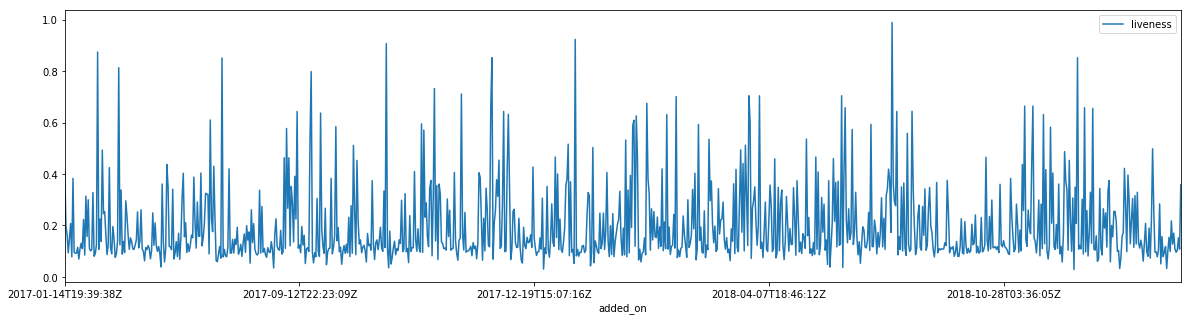

In [11]:
df.sort_values(by='added_on',ascending=True).plot(
    y='liveness',x='added_on',
    kind='line',
    figsize=(20,5)
)

# How many tracks are added during different parts of the day?
---

In [5]:
#df.to_csv('spotify_track_info.csv',index=False)

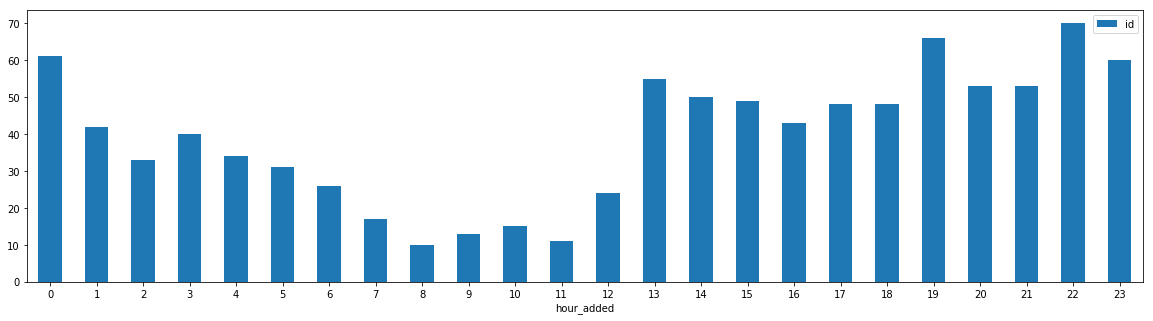

In [15]:
df.groupby('hour_added').count().reset_index().plot(y='id',x='hour_added',figsize=(20,5),kind='bar',rot=0)

# All features over time:
---

In [46]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

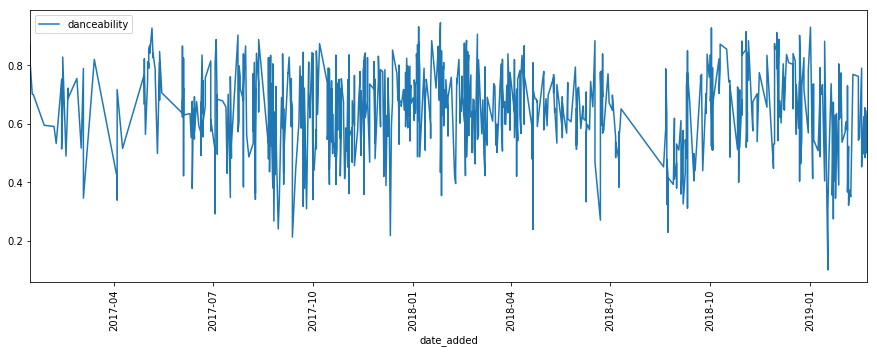

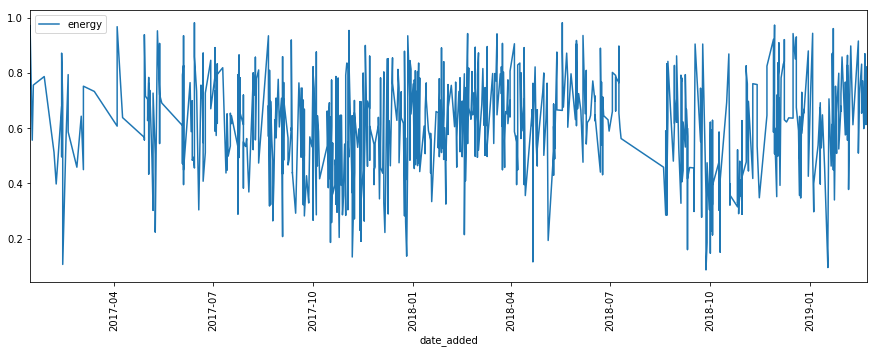

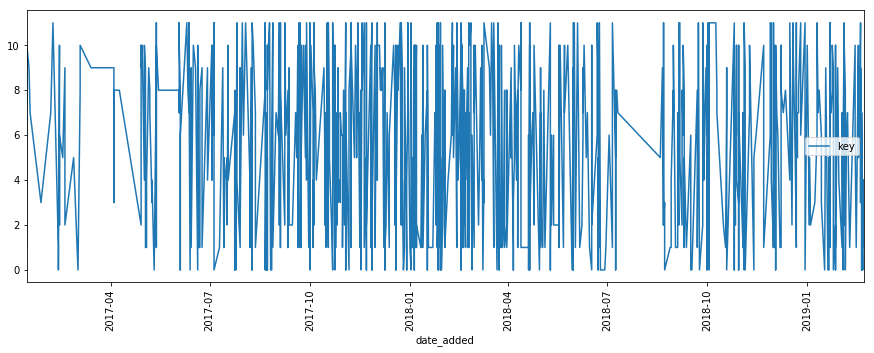

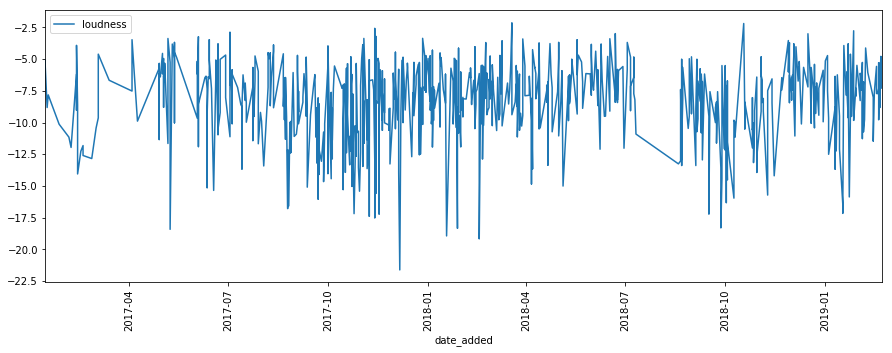

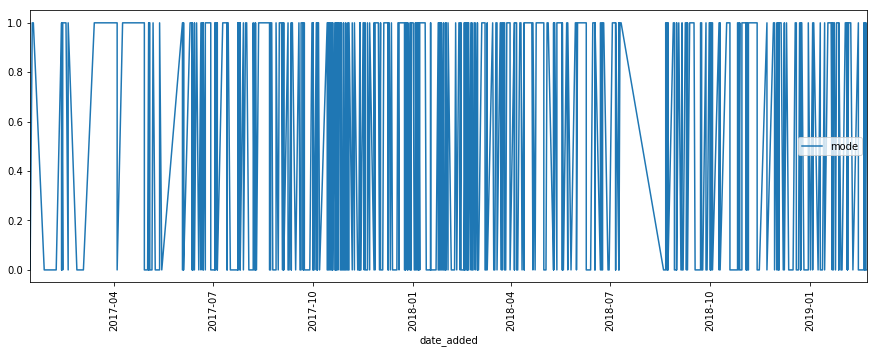

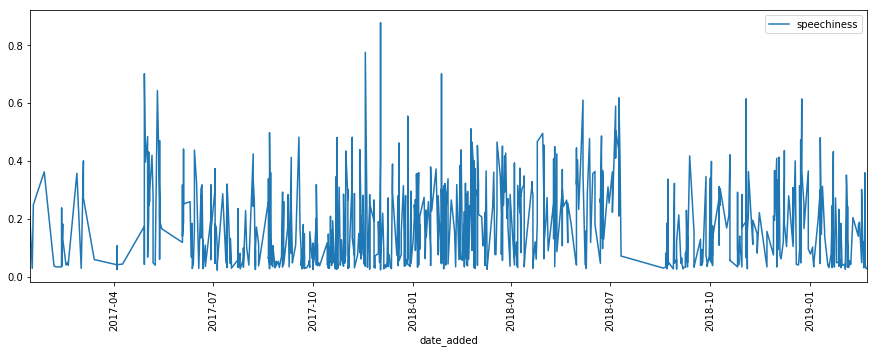

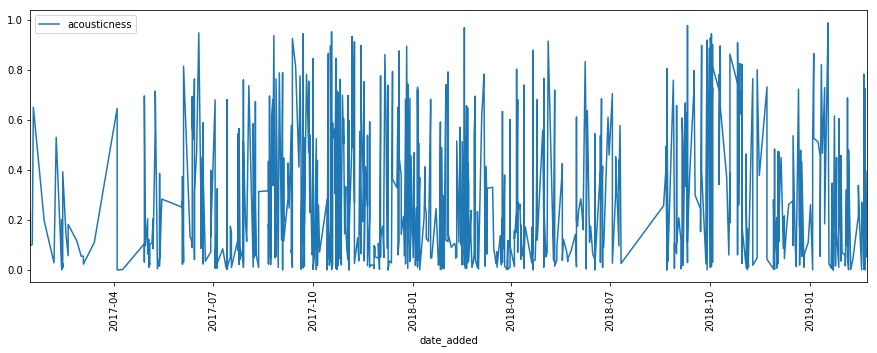

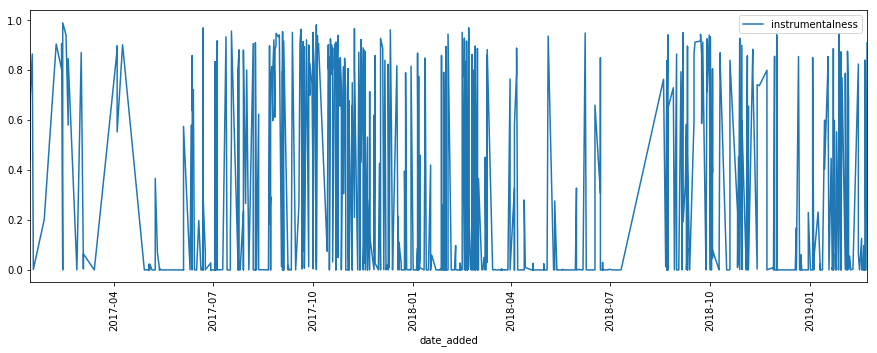

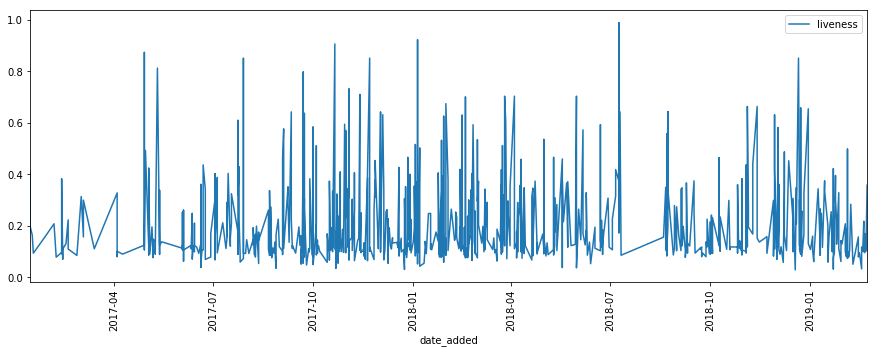

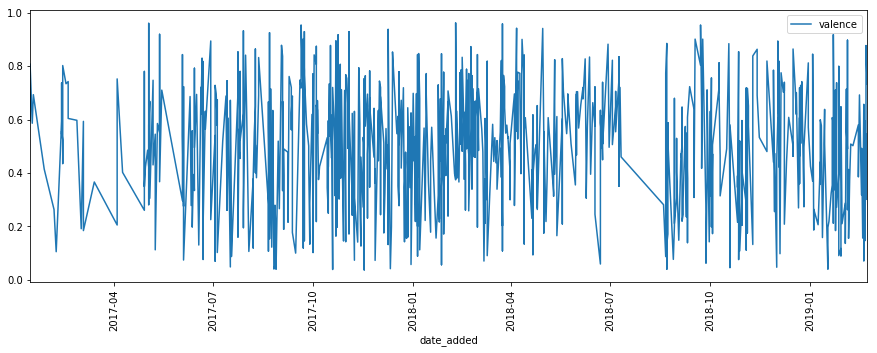

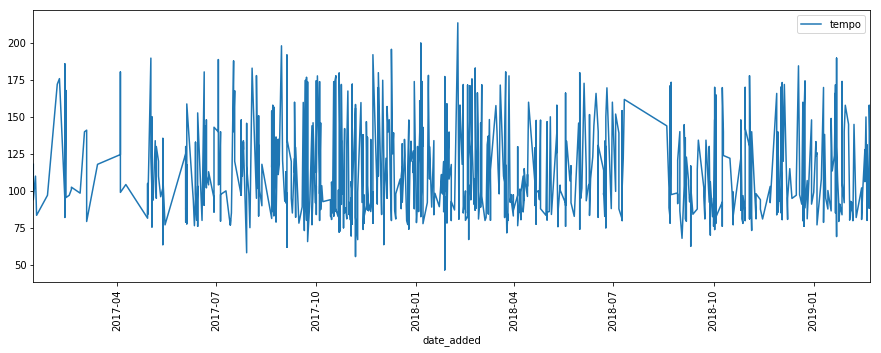

In [62]:
for feature in features:
    df.plot(y=feature,x='date_added',rot=90,figsize=(15,5),kind='line')

# By Hour Added  
---

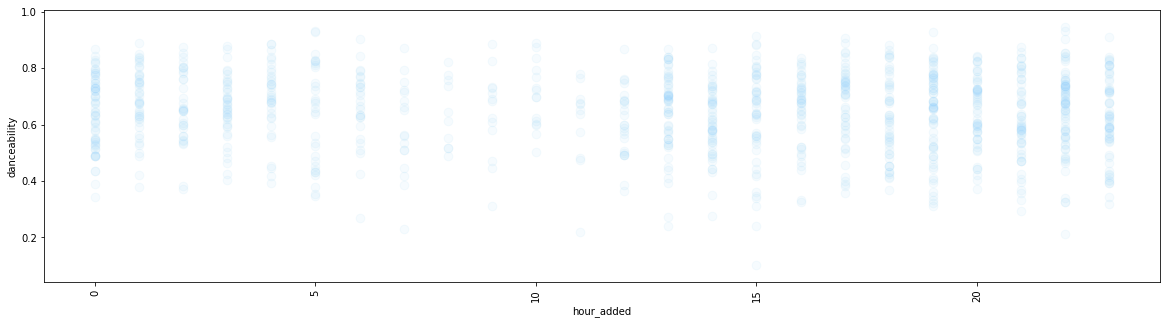

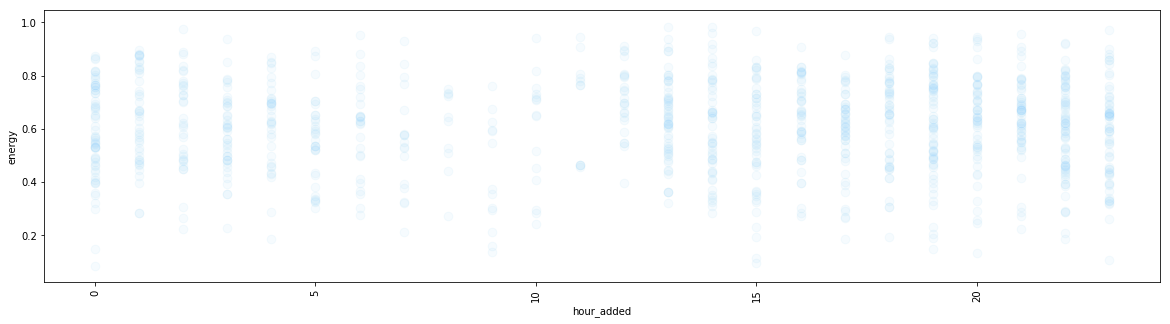

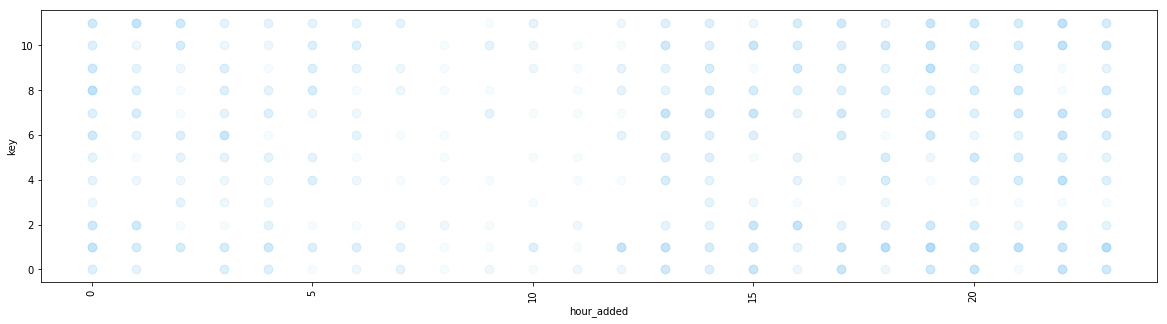

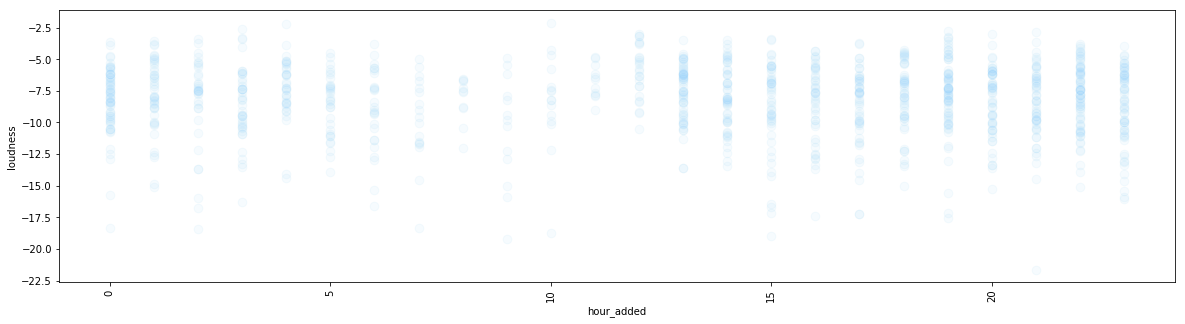

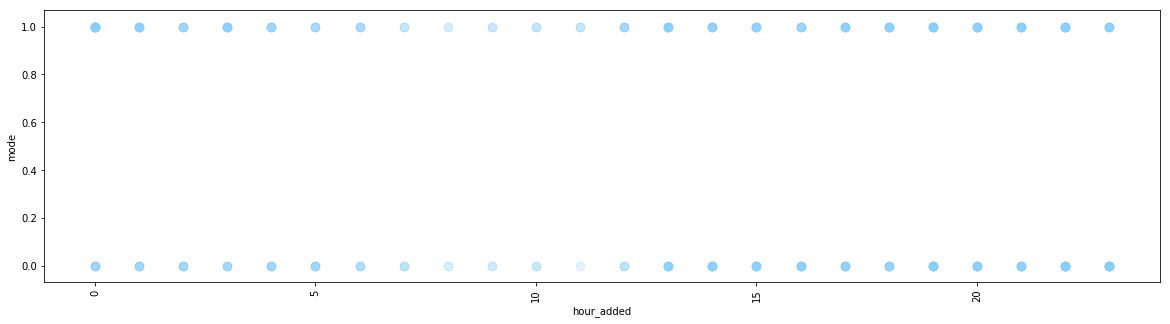

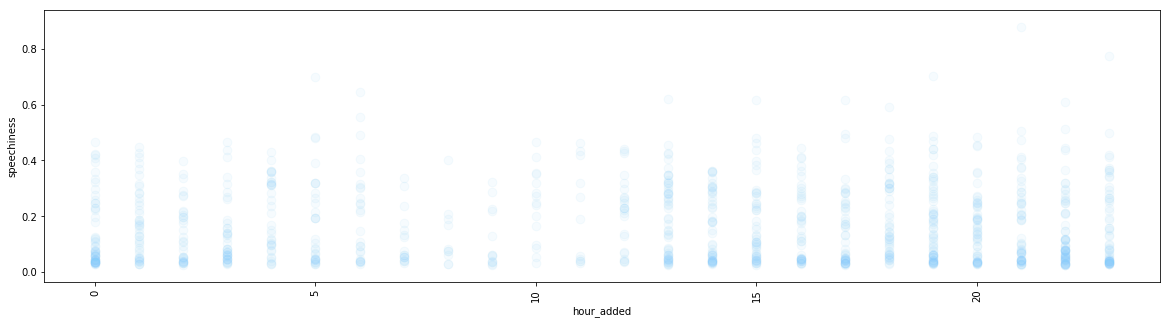

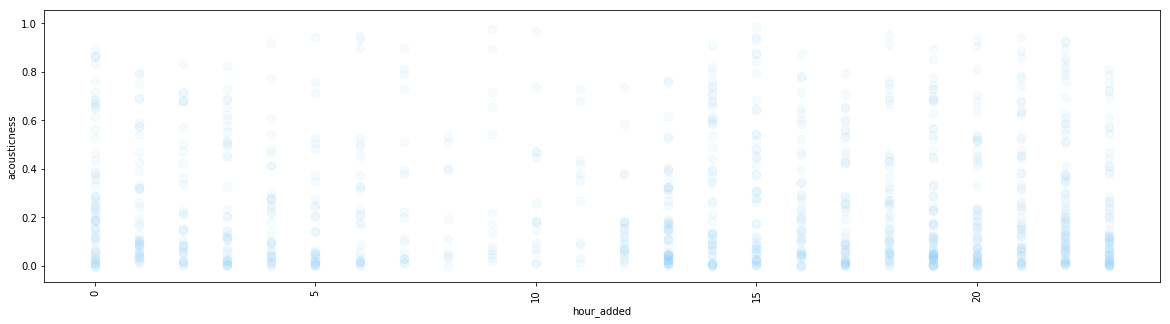

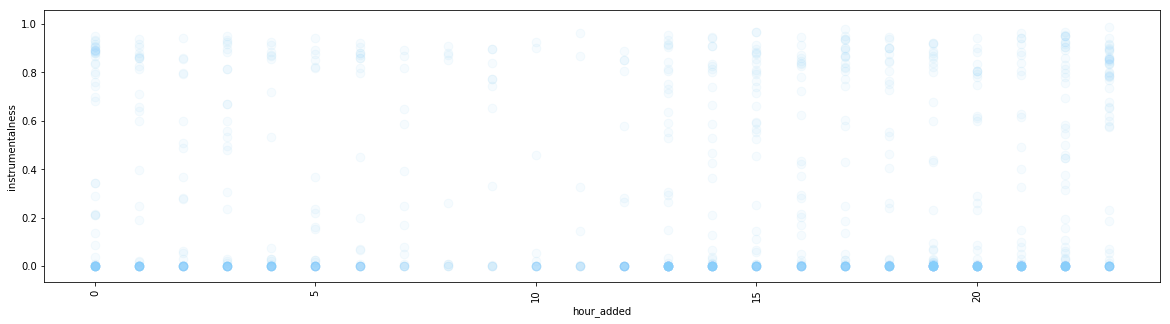

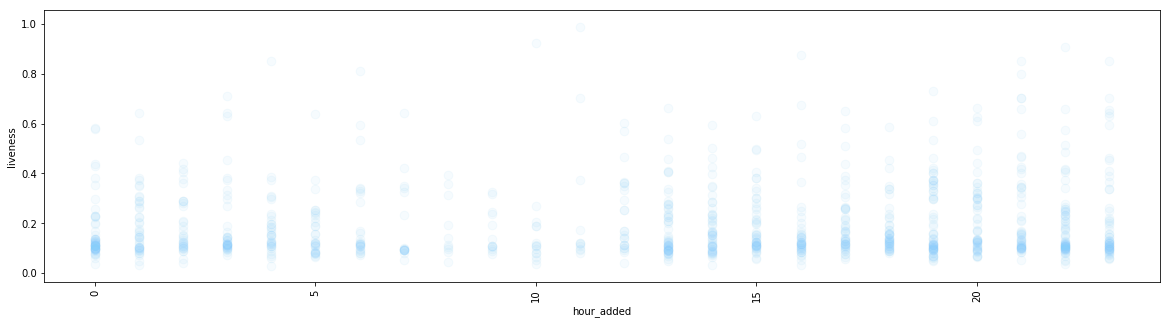

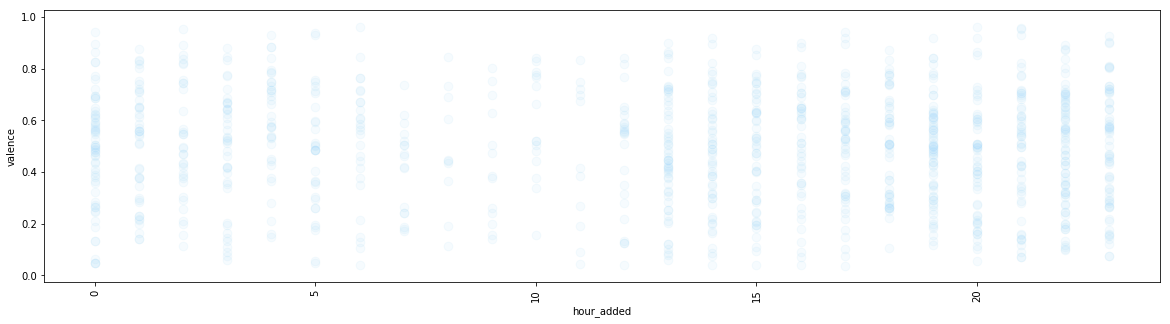

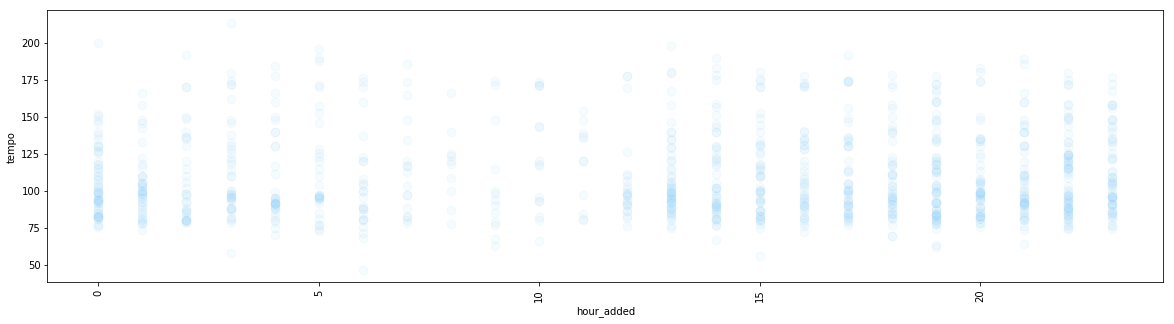

In [133]:
for feature in features:
    df.plot(y=feature,x='hour_added',rot=90,figsize=(20,5),kind='scatter',alpha=.075,c='lightskyblue',s=75)

Energy has an interesting trend:

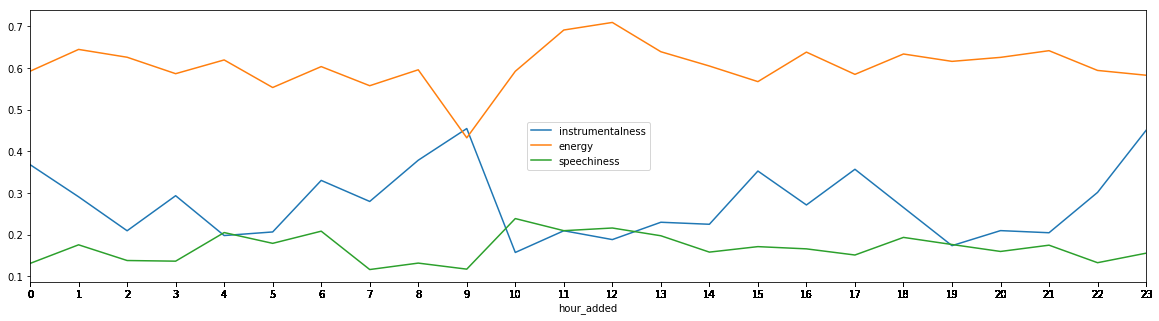

In [150]:
df.groupby('hour_added').mean().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['hour_added']
) # this is coffee.

# By Day Added

Less days in the week than hours in a day, so there is more overlap of values (so a smaller marker size is used)

---

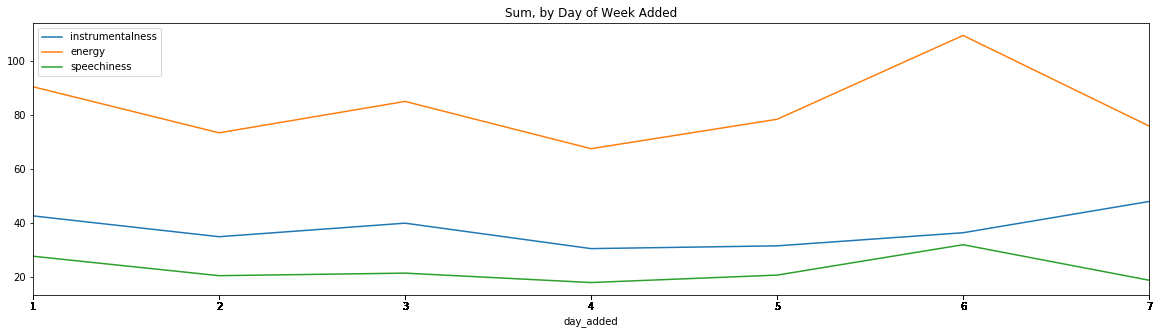

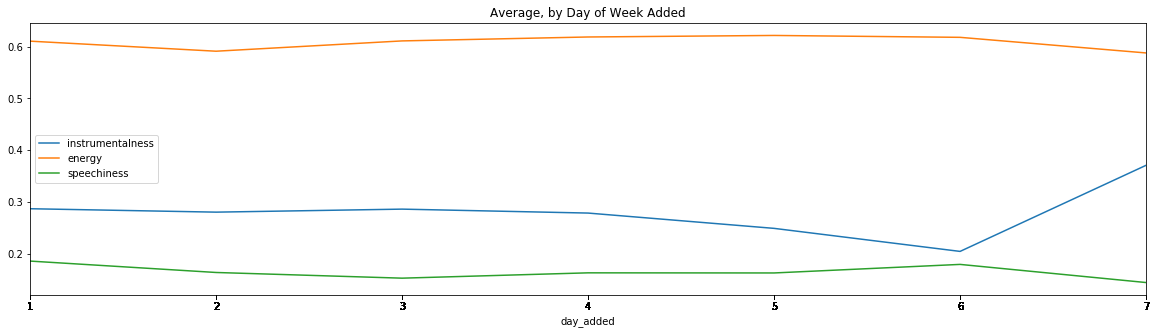

In [155]:
df.groupby('day_added').sum().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['day_added'],
    title='Sum, by Day of Week Added'
) # this is coffee.

df.groupby('day_added').mean().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['day_added'],
    title='Average, by Day of Week Added'
) # this is coffee.

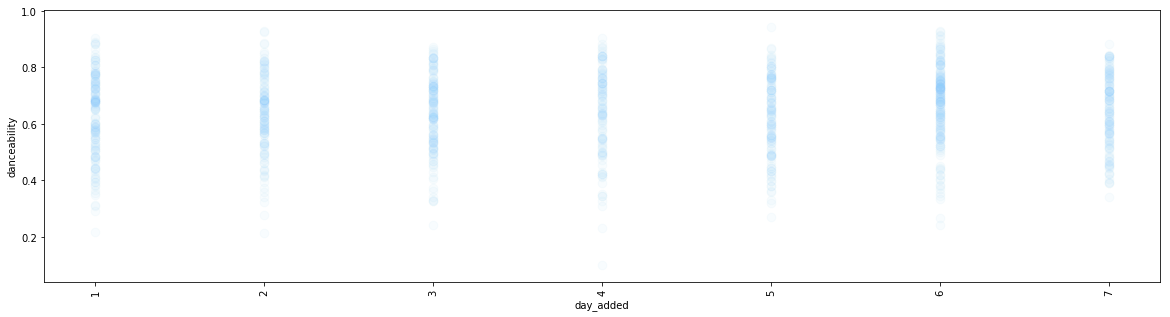

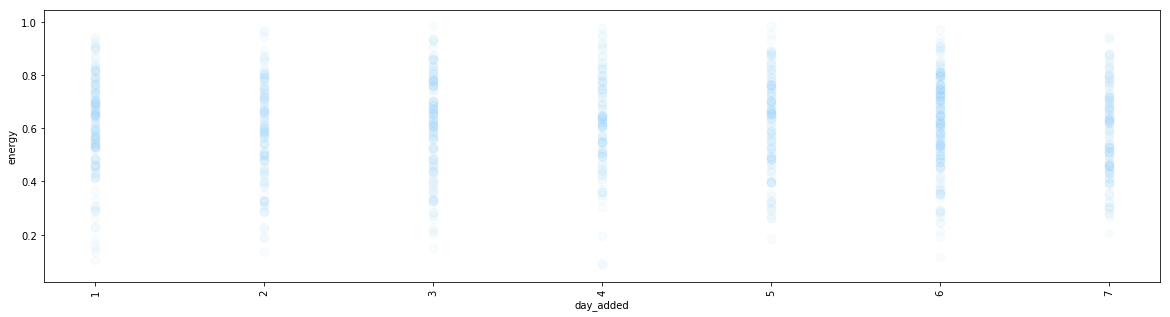

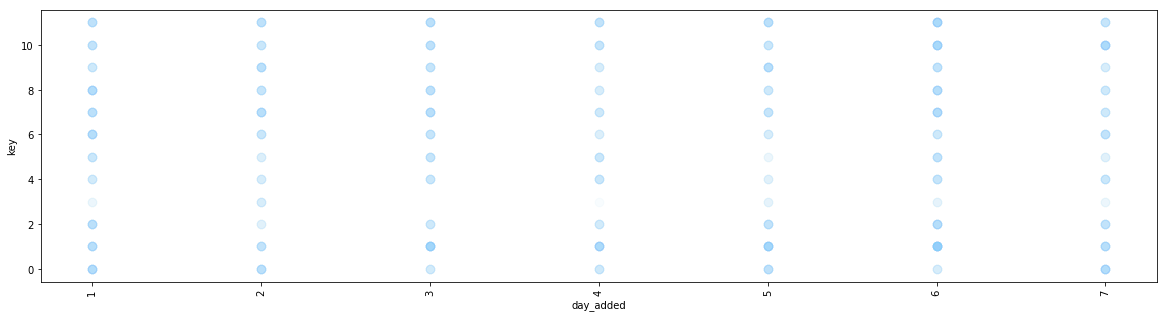

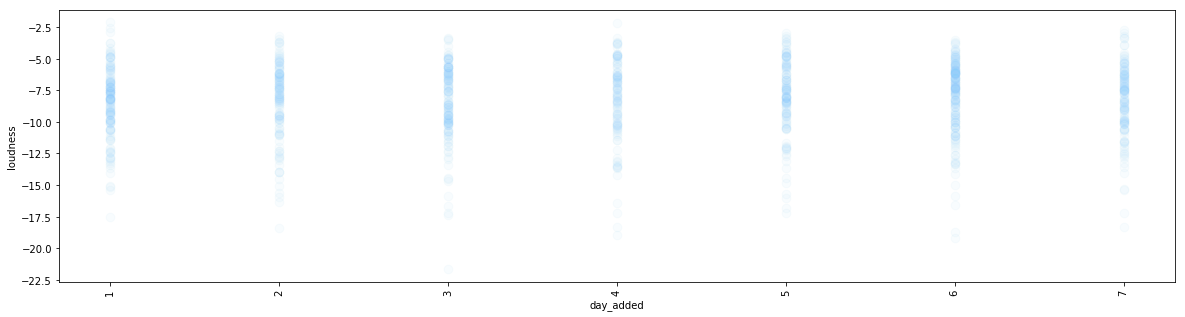

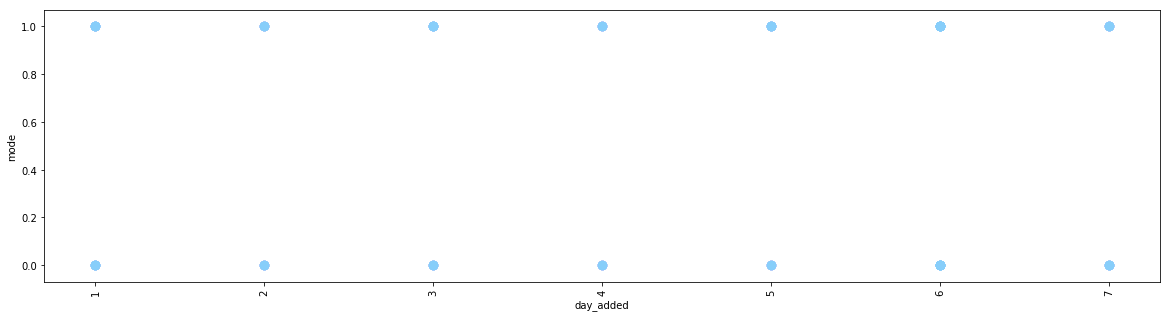

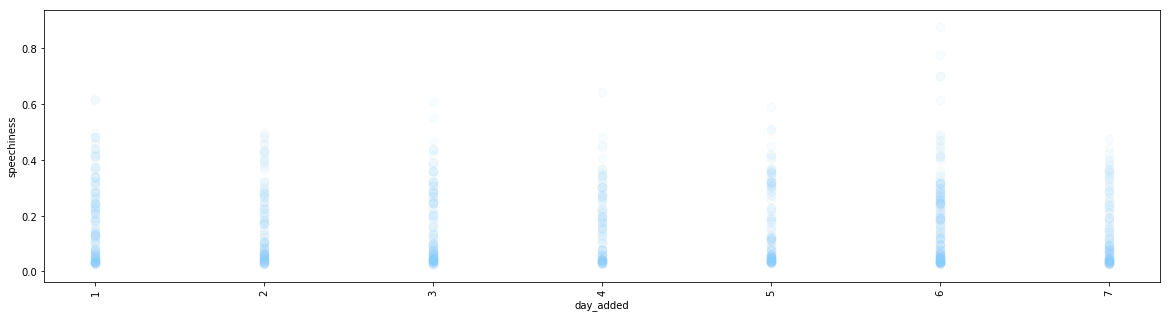

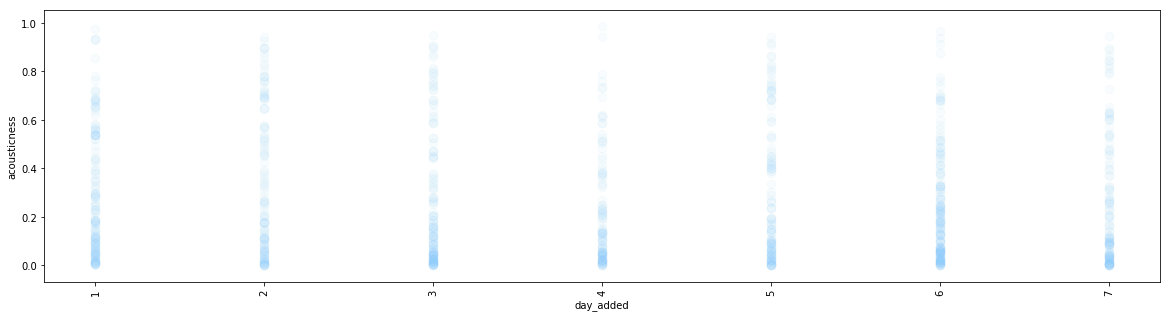

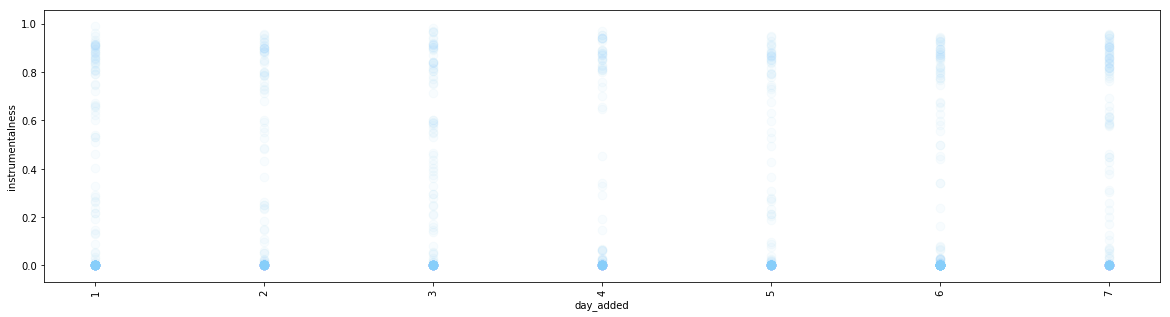

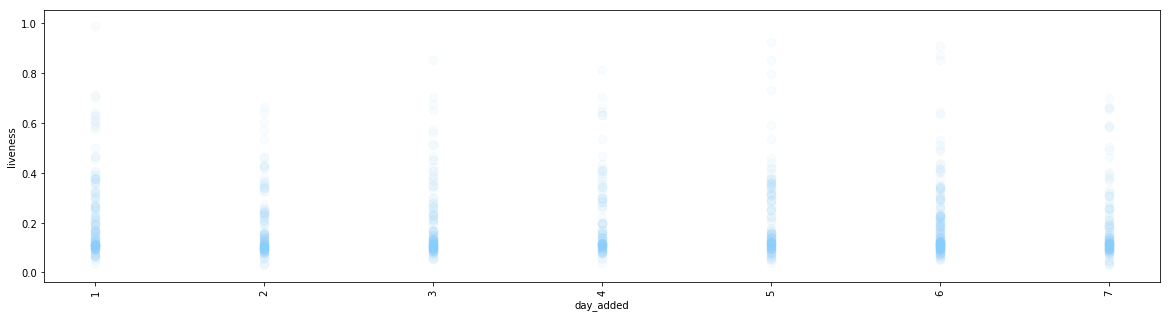

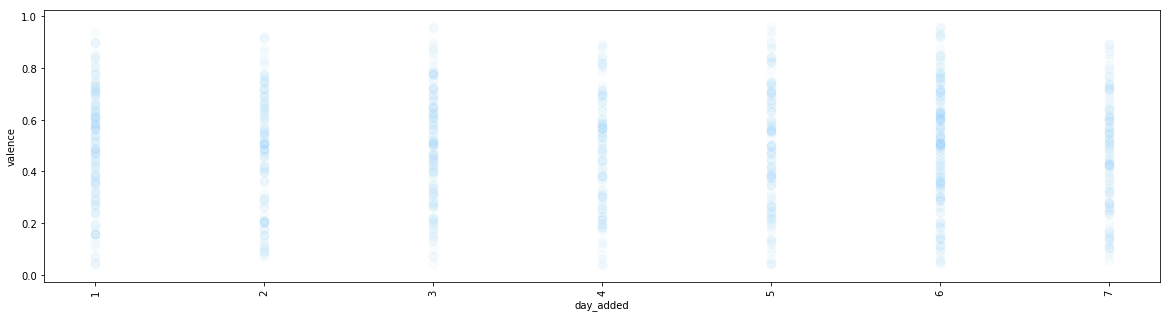

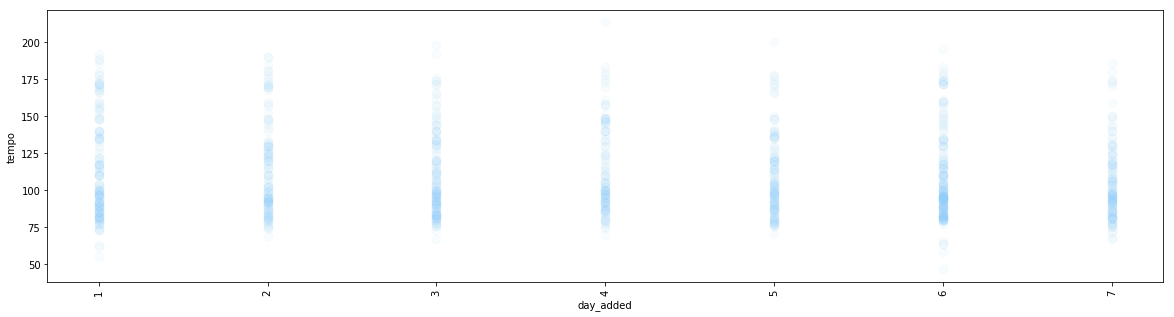

In [135]:
for feature in features:
    df.plot(y=feature,x='day_added',rot=90,figsize=(20,5),kind='scatter',alpha=.05,c='lightskyblue',s=75)

---

What are the songs added after 10AM?

In [33]:
df[(df['hour_added'] >= 11) & (df['hour_added'] <= 13)]

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_popularity,track_uri,added_on,danceability,energy,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,time_added,date_added,hour_added
110,7fiCA5gPq6WzaT4Mz4AOgF,Sanguine,spotify:user:125065858:playlist:7fiCA5gPq6WzaT...,7hZoTr4ffMGqm9opMiGmBp,ONCE UPON A TIME (FREESTYLE),58,spotify:track:7hZoTr4ffMGqm9opMiGmBp,2018-12-03T12:54:07Z,0.653,0.910,...,audio_features,7hZoTr4ffMGqm9opMiGmBp,spotify:track:7hZoTr4ffMGqm9opMiGmBp,https://api.spotify.com/v1/tracks/7hZoTr4ffMGq...,https://api.spotify.com/v1/audio-analysis/7hZo...,150819.0,4.0,12:54:07,2018-12-03,12
158,42WJ3m1deT5U54yQaF6tNe,Scarbrother,spotify:user:125065858:playlist:42WJ3m1deT5U54...,1zlclNkERGFrCxznXOgkD3,Celebrate,53,spotify:track:1zlclNkERGFrCxznXOgkD3,2018-11-13T13:58:31Z,0.703,0.759,...,audio_features,1zlclNkERGFrCxznXOgkD3,spotify:track:1zlclNkERGFrCxznXOgkD3,https://api.spotify.com/v1/tracks/1zlclNkERGFr...,https://api.spotify.com/v1/audio-analysis/1zlc...,226187.0,4.0,13:58:31,2018-11-13,13
161,4qLv51SCK4AQs0EMunmuYm,Libations,spotify:user:125065858:playlist:4qLv51SCK4AQs0...,3INjGuysxsRjLSmZKtS3lq,Rye Lane Shuffle,31,spotify:track:3INjGuysxsRjLSmZKtS3lq,2018-09-17T13:22:42Z,0.440,0.906,...,audio_features,3INjGuysxsRjLSmZKtS3lq,spotify:track:3INjGuysxsRjLSmZKtS3lq,https://api.spotify.com/v1/tracks/3INjGuysxsRj...,https://api.spotify.com/v1/audio-analysis/3INj...,266226.0,4.0,13:22:42,2018-09-17,13
167,4qLv51SCK4AQs0EMunmuYm,Libations,spotify:user:125065858:playlist:4qLv51SCK4AQs0...,2SlRlMipXkLd822vd6nr28,Snipes in The Coupe,18,spotify:track:2SlRlMipXkLd822vd6nr28,2018-09-27T13:33:37Z,0.703,0.362,...,audio_features,2SlRlMipXkLd822vd6nr28,spotify:track:2SlRlMipXkLd822vd6nr28,https://api.spotify.com/v1/tracks/2SlRlMipXkLd...,https://api.spotify.com/v1/audio-analysis/2SlR...,104126.0,4.0,13:33:37,2018-09-27,13
169,4qLv51SCK4AQs0EMunmuYm,Libations,spotify:user:125065858:playlist:4qLv51SCK4AQs0...,0eEgMbSzOHmkOeVuNC3E0k,Kids With Guns,62,spotify:track:0eEgMbSzOHmkOeVuNC3E0k,2018-09-28T13:42:57Z,0.838,0.475,...,audio_features,0eEgMbSzOHmkOeVuNC3E0k,spotify:track:0eEgMbSzOHmkOeVuNC3E0k,https://api.spotify.com/v1/tracks/0eEgMbSzOHmk...,https://api.spotify.com/v1/audio-analysis/0eEg...,225773.0,4.0,13:42:57,2018-09-28,13
188,4qLv51SCK4AQs0EMunmuYm,Libations,spotify:user:125065858:playlist:4qLv51SCK4AQs0...,5E36jz0CoZAiZFSKc8eZtW,Stimulus,37,spotify:track:5E36jz0CoZAiZFSKc8eZtW,2018-10-03T13:44:22Z,0.791,0.629,...,audio_features,5E36jz0CoZAiZFSKc8eZtW,spotify:track:5E36jz0CoZAiZFSKc8eZtW,https://api.spotify.com/v1/tracks/5E36jz0CoZAi...,https://api.spotify.com/v1/audio-analysis/5E36...,273973.0,4.0,13:44:22,2018-10-03,13
209,6qma3xOvF8kPzVn5Y9g59Y,Vitamins,spotify:user:125065858:playlist:6qma3xOvF8kPzV...,26AhgCPP2OKAnF4AyBf2Kg,Locket,63,spotify:track:26AhgCPP2OKAnF4AyBf2Kg,2018-08-28T13:32:13Z,0.393,0.481,...,audio_features,26AhgCPP2OKAnF4AyBf2Kg,spotify:track:26AhgCPP2OKAnF4AyBf2Kg,https://api.spotify.com/v1/tracks/26AhgCPP2OKA...,https://api.spotify.com/v1/audio-analysis/26Ah...,318379.0,4.0,13:32:13,2018-08-28,13
212,6qma3xOvF8kPzVn5Y9g59Y,Vitamins,spotify:user:125065858:playlist:6qma3xOvF8kPzV...,0puyikpyVwe8TTv2tvMHeq,Social Sites,58,spotify:track:0puyikpyVwe8TTv2tvMHeq,2018-08-29T13:23:11Z,0.411,0.618,...,audio_features,0puyikpyVwe8TTv2tvMHeq,spotify:track:0puyikpyVwe8TTv2tvMHeq,https://api.spotify.com/v1/tracks/0puyikpyVwe8...,https://api.spotify.com/v1/audio-analysis/0puy...,289309.0,4.0,13:23:11,2018-08-29,13
235,6qma3xOvF8kPzVn5Y9g59Y,Vitamins,spotify:user:125065858:playlist:6qma3xOvF8kPzV...,4Pd47r1xamgrYZb9qqDjE0,PURPLE TUESDAY (feat. Joey Bada$$ & Jesse Boyk...,48,spotify:track:4Pd47r1xamgrYZb9qqDjE0,2018-09-12T11:21:53Z,0.676,0.458,...,audio_features,4Pd47r1xamgrYZb9qqDjE0,spotify:track:4Pd47r1xamgrYZb9qqDjE0,https://api.spotify.com/v1/tracks/4Pd47r1xamgr...,https://api.spotify.com/v1/audio-analysis/4Pd4...,290333.0,4.0,11:21:53,2018-09-12,11
238,2NDHgD017BWNWcKgUwCDmJ,Canxer 

# Takeaways

---
- Does Spotify use time-based features in their recommendation systems?